In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.style.use('fivethirtyeight')

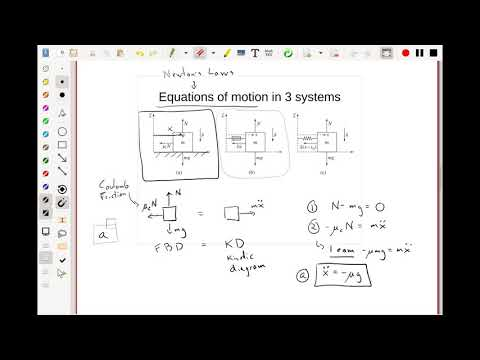

In [49]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Je-qT2FQrrM')

# Solving equations of motion

In this notebook, you will plot the solutions to three 1-DOF equations of motion. Each starts at the origin with an initial velocity, $v = 5~m/s$. The three equations of motion and solutions are derived in the video above

|system | equation of motion | solution|
|---|---|------|
|a.| $m\ddot{x} = -\mu mg$ |$\rightarrow x(t) = v_0t - \frac{\mu gt^2}{2}$|
|b.| $m\ddot{x} = -b \dot{x}$| $\rightarrow x(t) = \frac{v_0 m}{b}\left(1 - e^{-\frac{b}{m} t}\right)$ |
|c.| $m\ddot{x} = -k x$| $\rightarrow x(t) = \frac{v_0}{\omega}\sin\omega t$|

## Coulomb friction on a sliding block

This first example, has a small trick. The acceleration is constant, $-\mu g$, until the velocity is zero. At this point, the block stops moving. To solve for $x(t)$

- calculate $x(t)$ and $v(t)$ if acceleration is constant
- set the values of $v(t)<0$ to 0
- set the values of $x(t)$ given $v(t)=0$ as the maximum $x$

Here, $\mu=0.3$ and m = 0.5 kg

Text(0, 0.5, 'position (m)')

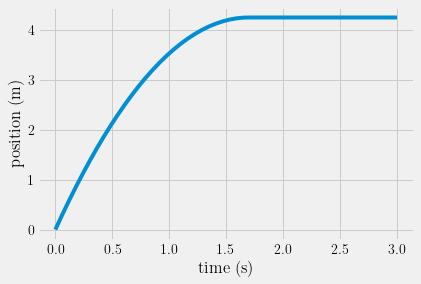

In [57]:
t = np.linspace(0, 3)
xa = 5*t - 0.5*0.3*9.81*t**2
va = 5 - 0.3*1*9.81*t
va[va < 0] = 0
xa[va == 0] = xa.max()
plt.plot(t, xa)
plt.xlabel('time (s)')
plt.ylabel('position (m)')

## Viscous friction

This second example has a exponentially decaying speed. This type of motion is common in door dampers and shock absorbers. The faster the object moves, the faster it decelerates. 

- $v(t) = v_0 e^{-\frac{b}{m}t}$
- $x(t) = \frac{v_0 m}{b}\left(1 - e^{-\frac{b}{m} t}\right)$

Here, b = 1 kg/s and m = 0.5 kg

Text(0, 0.5, 'position (m)')

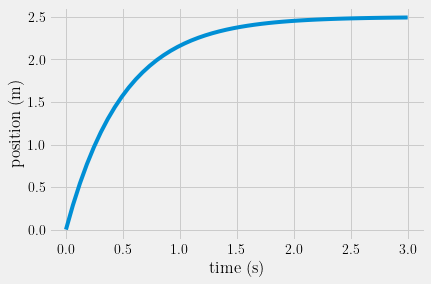

In [58]:
m = 0.5
b = 1
xb = 5*m/b*(1-np.exp(-b/m*t))
plt.plot(t, xb)
plt.xlabel('time (s)')
plt.ylabel('position (m)')

## Linear spring and the harmonic oscillator

This third example is a [harmonic oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator). Any object that has a restoring force e.g. a spring attached to a mass, a pendulum swinging, object hanging from a rubber band. The harmonic oscillator is described by the general equation

$\ddot{x} = -\omega^2 x$

where $\omega = \sqrt{\frac{k}{m}}$ for a spring mass. Here, $k=2~N/m$ and m=0.5 kg. 

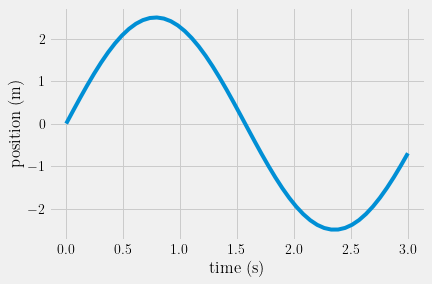

In [59]:
w = np.sqrt(2/0.5)
xc = 5/w*np.sin(w*t)
plt.plot(t, xc)
plt.xlabel('time (s)')
plt.ylabel('position (m)');

## Wrapping up - comparing all three examples

You have plotted three solutions 

1. sliding with friction
2. viscous friction
3. harmonic oscillator

Now, you can plot all three together. 

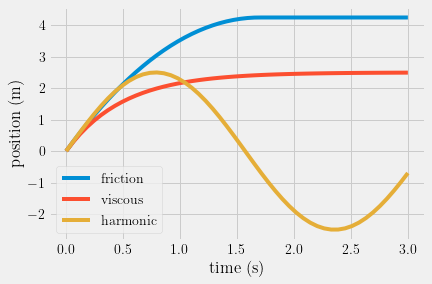

In [60]:
plt.plot(t, xa, label = 'friction')
plt.plot(t, xb, label = 'viscous') 
plt.plot(t, xc, label = 'harmonic')
plt.legend();
plt.xlabel('time (s)')
plt.ylabel('position (m)');

Some similiraties between the three plots

- each plot begins at 0 m
- each plot has the same initial slope

Some differences between the three plots

- the friction and viscous friction have a final position, but the harmonic plot continues to move
- the blue friction plot has two distinct functions: $\propto t^2$ and $\propto constant$, but the other plots are continuous functions